<a href="https://colab.research.google.com/github/jorgecard/U/blob/main/Puestas_a_Tierra_Bicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [ ]:
import numpy as np
from scipy.optimize import minimize

import pandas as pd
import base64

import matplotlib.pyplot as plt
import seaborn as sns

# Funciones

In [ ]:
def Resistivity_0(a=2, ro=[100,200], h=1.5, Np=100):
    """
    a: distancia entre los electrodos usadas en el método de Wenner
    ro: vector que corresponde a las valores de resistividad del suelo
    [ro_capa1, ro_capa2]
    h : escalar que corresponde a la profundidad del modelo de dos capas
    Np: número de elementos de la serie
    roc: la resistividad aparente calculada
    """
    a_ro = np.array(ro)
    #% cálculo de los coeficientes de reflexión
    k = (a_ro[1:]-a_ro[:-1])/(a_ro[1:]+a_ro[:-1])
    # Ec 5
    Suma1 = 0
    for q in range(1,Np):
        kn = k[0]**q
        cn = (2*q*h/a)**2
        c1 = kn/np.sqrt(1+cn)
        c2 = kn/np.sqrt(4+cn)
        Suma1 +=(c1-c2)
    roc = ro[0]*(1 + 4*Suma1)
    return roc # p_aj (resistividad aparente)

def Error_ro1(Xd,M_a,M_ro):
    """
    Xd:[ro1,ro2,h]
    M_a:lista distancias
    M_ro:lista resistiv
    Calcula el error cuadratico medio con el modelo de 2 capas usando la funcion Resistivity_0().
    len(M_a) == len(M_ro) debe cumplirse
    """
    global p_aj
    p_aj = []
    NN = len(M_a)
    S_errorc=0
    for q in range(NN):
        ro_aj = Resistivity_0(M_a[q],Xd[:2],Xd[2]) # p_aj
        p_aj.append(ro_aj) # guardo datos
        ec = ((M_ro[q] - ro_aj)/M_ro[q])**2
        S_errorc += ec
    return S_errorc

def capture(x):
  x_values.append(x)

In [ ]:
def Two_Layer_Parameters(X_a,Y_a):
  global x_values
  global h
  # prueba función error
  print("Error_ro1([800,200,1.0],X_a,Y_a): ",Error_ro1([800,200,1.0],X_a,Y_a))
  # capturo valores
  x_values = []
  ## Minimizar el error
  RES_0 = minimize(Error_ro1, [800,200,1],(X_a,Y_a), method='Nelder-Mead', callback=capture)
  # RES_0 = minimize(Error_ro1, [800,200,1],(X_a,Y_a), method='Powell')
  print("Respuesta: \n",RES_0)
  print('----------------')
  print('X_a (distancias)= ',X_a)
  print('Y_a (resistividad)= ',Y_a)
  print('----------------')
  print('rho 1=',RES_0.x[0])
  print('rho 2=',RES_0.x[1])
  print('h    =',RES_0.x[2])
  h = RES_0.x[2]

  # Crear las gráficas

  # Convertir los valores capturados a un array
  x_values_array = np.array(x_values)
  # Crear un arreglo de gráficas de 3 filas y 1 columna (cada variable en una fila)
  fig, axs = plt.subplots(3, 1, figsize=(8, 5))
  # Graficar los valores de rho1 en función de las iteraciones
  iterations = range(len(x_values))
  axs[0].plot(iterations, x_values_array[:, 0], marker='.', linestyle='-', color = 'blue')
  axs[0].set_ylabel("rho 1 [Ohm-m]")
  axs[0].grid(True)
  # Graficar los valores de rho2 en función de las iteraciones
  axs[1].plot(iterations, x_values_array[:, 1], marker='.', linestyle='-', color = 'green')
  axs[1].set_ylabel("rho 2 [Ohm-m]")
  axs[1].grid(True)
  # Graficar los valores de h en función de las iteraciones
  axs[2].plot(iterations, x_values_array[:, 2], marker='.', linestyle='-', color = 'red')
  axs[2].set_ylabel("h [m]")
  axs[2].set_xlabel("Iteraciones")
  axs[2].grid(True)

  # Muestra la gráfica de p_aj vs la distancia y Y_a vs distancia
  fig, ax = plt.subplots(figsize=(5, 3))
  ax.plot(X_a, p_aj, marker='.', linestyle='-', color='purple', label='Resistividad Aparente Calculada')
  ax.plot(X_a, Y_a, marker='.', linestyle='-', color='green', label='Resistividad Aparente Medida')
  ax.set_xlabel("a [m]")
  ax.set_ylabel("rho [Ohm-m]")
  ax.grid(True)
  plt.title("Comparación entre los datos de Resistividad Aparentes Calculados vs Medidos")
  ax.legend()

  plt.tight_layout()
  plt.show()

# Ejecución ejemplo

In [ ]:
# Caso 1
X_a = [2.5,5,7.5,10,12.5,15]  # lista distancias
Y_a = [320,245,182,162,168,152]  # lista resistiv

# Caso 2
#X_a = [1, 1.5, 2.5, 3, 5, 10]  # lista distancias
#Y_a = [255, 290, 315, 376, 528, 690]  # lista resistiv

# Caso 3
X_a = [0.5, 1, 1.5,2, 2.5, 3,4,5]  # lista distancias
Y_a = [58.71, 61.79, 58.1, 61, 73.79, 78, 79.1, 78.2]  # lista resistiv

Error_ro1([800,200,1.0],X_a,Y_a):  342.32815850961475
Respuesta: 
        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.02399348334103618
             x: [ 5.735e+01  9.671e+01  1.652e+00]
           nit: 329
          nfev: 595
 final_simplex: (array([[ 5.735e+01,  9.671e+01,  1.652e+00],
                       [ 5.735e+01,  9.671e+01,  1.652e+00],
                       [ 5.735e+01,  9.671e+01,  1.652e+00],
                       [ 5.735e+01,  9.671e+01,  1.652e+00]]), array([ 2.399e-02,  2.399e-02,  2.399e-02,  2.399e-02]))
----------------
X_a (distancias)=  [0.5, 1, 1.5, 2, 2.5, 3, 4, 5]
Y_a (resistividad)=  [58.71, 61.79, 58.1, 61, 73.79, 78, 79.1, 78.2]
----------------
rho 1= 57.34502582522133
rho 2= 96.71064421892223
h    = 1.6515326898085434


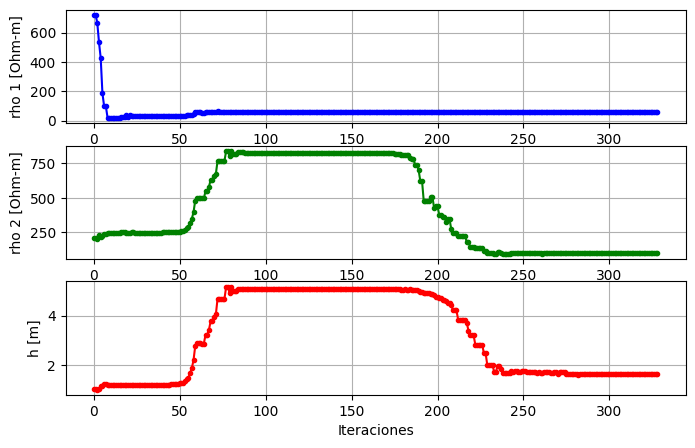

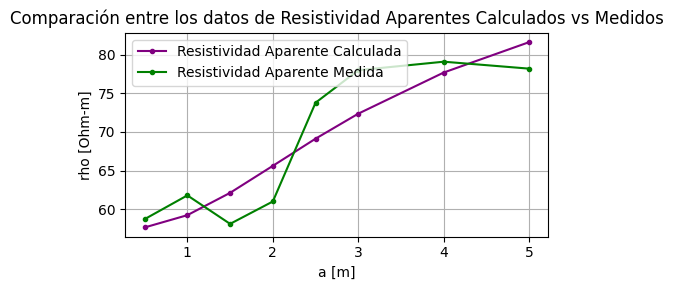

In [ ]:
Two_Layer_Parameters(X_a,Y_a)

# Ejecución APE1

Mediciones

In [ ]:
def create_onedrive_directdownload (onedrive_link):
    data_bytes64 = base64.b64encode(bytes(onedrive_link, 'utf-8'))
    data_bytes64_String = data_bytes64.decode('utf-8').replace('/','_').replace('+','-').rstrip("=")
    resultUrl = f"https://api.onedrive.com/v1.0/shares/u!{data_bytes64_String}/root/content"
    return resultUrl

onedrive_link = "https://1drv.ms/x/s!AuH0cqh1REoYpAr83OsG39bbFBHx?e=VbtQmo"
onedrive_direct_link = create_onedrive_directdownload(onedrive_link)
print(f"Original OneDriveLink: {onedrive_link}")
print(f"Generated Direct Download Link: {onedrive_direct_link}")
df = pd.read_excel(onedrive_direct_link, sheet_name = "Datos", skiprows=0)

Original OneDriveLink: https://1drv.ms/x/s!AuH0cqh1REoYpAr83OsG39bbFBHx?e=VbtQmo
Generated Direct Download Link: https://api.onedrive.com/v1.0/shares/u!aHR0cHM6Ly8xZHJ2Lm1zL3gvcyFBdUgwY3FoMVJFb1lwQXI4M09zRzM5YmJGQkh4P2U9VmJ0UW1v/root/content


In [ ]:
df_Wenner = df[(df["TERRENO"] == 'Arquitectura') & (df["MÉTODO"] == 'Wenner')]
df_Wenner = df_Wenner.drop(index=df_Wenner.index[:2])
df_Wenner = df_Wenner.reset_index(drop=True)
df_Schlumberger = df[(df["TERRENO"] == 'Arquitectura') & (df["MÉTODO"] == 'Schlumberger')]
df_Schlumberger = df_Schlumberger.reset_index(drop=True)

In [ ]:
df_Wenner

,Distancia [m],Resistividad [ohm/m],Resistencia [ohm],TERRENO,MÉTODO,H=3/4a
0,3,300,15.90,Arquitectura,Wenner,2.25
1,3,300,15.90,Arquitectura,Wenner,2.25
2,4,255,10.10,Arquitectura,Wenner,3.00
3,4,257,10.20,Arquitectura,Wenner,3.00
4,5,229,7.28,Arquitectura,Wenner,3.75
5,5,228,7.27,Arquitectura,Wenner,3.75
6,6,217,5.75,Arquitectura,Wenner,4.50
7,6,218,5.78,Arquitectura,Wenner,4.50
8,7,215,4.89,Arquitectura,Wenner,5.25
9,7,216,4.91,Arquitectura,Wenner,5.25


In [ ]:
# print("Tipo de datos de X_a:", type(X_a))

# Wenner
X_a = df_Wenner["Distancia [m]"].tolist()                 # lista distancias
Y_a = df_Wenner["Resistividad [ohm/m]"].tolist()          # lista resistiv

# X_a = df_Schlumberger["Distancia [m]"].tolist()                 # lista distancias
# Y_a = df_Schlumberger["Resistividad [ohm/m]"].tolist()          # lista resistiv

Ejecución

Error_ro1([800,200,1.0],X_a,Y_a):  0.034199462468646705
Respuesta: 
        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.0008372166813063008
             x: [ 6.155e+02  2.005e+02  1.259e+00]
           nit: 121
          nfev: 223
 final_simplex: (array([[ 6.155e+02,  2.005e+02,  1.259e+00],
                       [ 6.155e+02,  2.005e+02,  1.259e+00],
                       [ 6.155e+02,  2.005e+02,  1.259e+00],
                       [ 6.155e+02,  2.005e+02,  1.259e+00]]), array([ 8.372e-04,  8.372e-04,  8.372e-04,  8.372e-04]))
----------------
X_a (distancias)=  [3, 3, 4, 4, 5, 5, 6, 6, 7, 7]
Y_a (resistividad)=  [300, 300, 255, 257, 229, 228, 217, 218, 215, 216]
----------------
rho 1= 615.5260864894192
rho 2= 200.5218456093465
h    = 1.2592929341905537


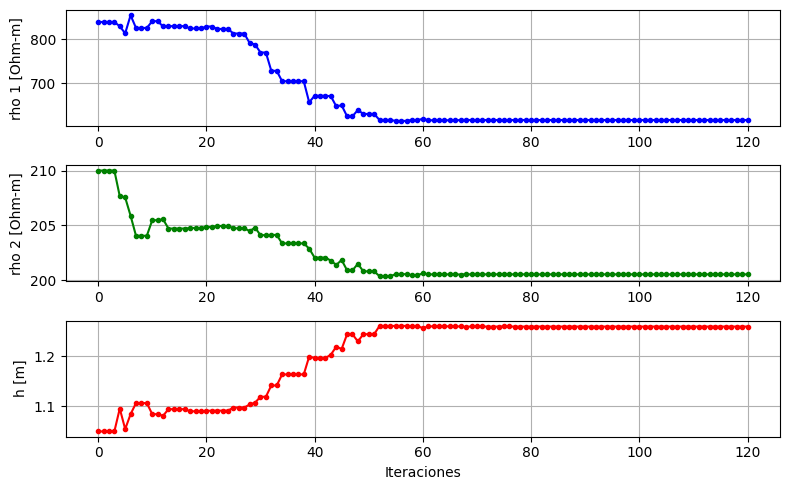

In [ ]:
Two_Layer_Parameters(X_a,Y_a)

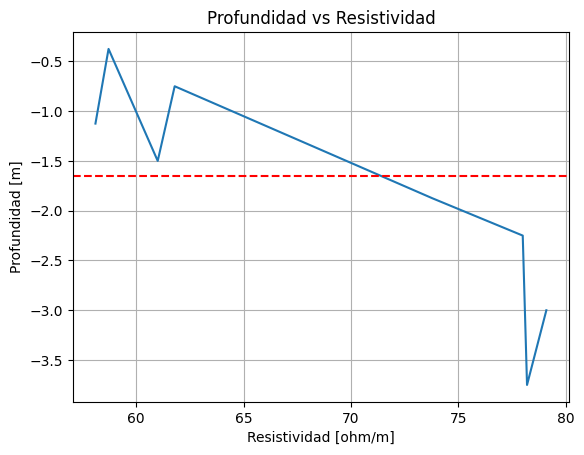

In [ ]:
# Convertir la lista X_a en un array de numpy
X_a_array = np.array(X_a)

# Calcular H_a
H_a = -3 * X_a_array / 4

# Crear el gráfico
sns.lineplot(x=Y_a, y=H_a)
plt.title("Profundidad vs Resistividad")
plt.ylabel("Profundidad [m]")
plt.xlabel("Resistividad [ohm/m]")
plt.grid(True)

# # Agregar la línea horizontal h
plt.axhline(y=-h, color='r', linestyle='--')

plt.show()